RL Bench Sandbox

In [17]:
import numpy as np

from rlbench.action_modes.action_mode import MoveArmThenGripper
from rlbench.action_modes.arm_action_modes import JointVelocity
from rlbench.action_modes.gripper_action_modes import Discrete
from rlbench.environment import Environment
from rlbench.observation_config import ObservationConfig
from rlbench.tasks import FS10_V1, ReachTarget



In [18]:
class Agent(object):

    def __init__(self, action_shape):
        self.action_shape = action_shape

    def act(self, obs):
        arm = np.random.normal(0.0, 0.1, size=(self.action_shape[0] - 1,))
        gripper = [1.0]  # Always open
        return np.concatenate([arm, gripper], axis=-1)




In [19]:
obs_config = ObservationConfig()
obs_config.set_all(True)

env = Environment(
    action_mode=MoveArmThenGripper(
        arm_action_mode=JointVelocity(), gripper_action_mode=Discrete()),
    obs_config=ObservationConfig(),
    headless=False)
env.launch()



In [20]:
agent = Agent(env.action_shape)

train_tasks = FS10_V1['train']
test_tasks = FS10_V1['test']



In [21]:
task = env.get_task(ReachTarget)
task.get_name()
descriptions, obs = task.reset()


In [22]:
agent.act(obs)

array([ 0.01733038, -0.02635431, -0.00359497, -0.04026756,  0.124352  ,
       -0.12466782,  0.22800889,  1.        ])

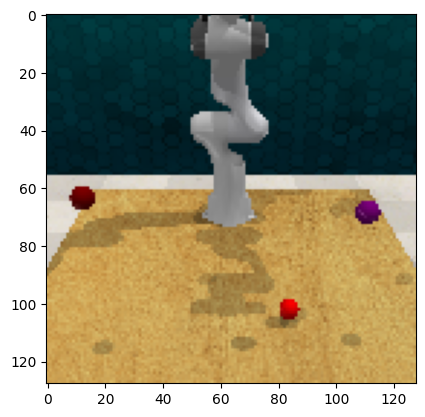

In [23]:
# Creat image of the front_rgb camera observation
import matplotlib.pyplot as plt
plt.imshow(obs.front_rgb)
plt.show()


In [24]:
training_cycles_per_task = 3
training_steps_per_task = 80
episode_length = 40

for _ in range(training_cycles_per_task):

    task_to_train = np.random.choice(train_tasks, 1)[0]
    task = env.get_task(task_to_train)
    task.sample_variation()  # random variation

    for i in range(training_steps_per_task):
        if i % episode_length == 0:
            print('Reset Episode')
            descriptions, obs = task.reset()
            print(descriptions)
        action = agent.act(obs)
        obs, reward, terminate = task.step(action)
        print('Step: {} Reward: {}'.format(i, reward))


        

print('Done')
env.shutdown()

Reset Episode
['toilet seat down', 'put the toilet seat down', 'grasping the top of the lid, close the toilet seat', 'put the toilet lid down', 'leave the toilet seat down', 'close the lid on the toilet', 'leave the toilet seat down', 'lower the toilet seat', 'grip the edge of the toilet lid and lower it flat on the toilet seat']
Step: 0 Reward: 0.0
Step: 1 Reward: 0.0
Step: 2 Reward: 0.0
Step: 3 Reward: 0.0
Step: 4 Reward: 0.0
Step: 5 Reward: 0.0
Step: 6 Reward: 0.0
Step: 7 Reward: 0.0
Step: 8 Reward: 0.0
Step: 9 Reward: 0.0
Step: 10 Reward: 0.0
Step: 11 Reward: 0.0
Step: 12 Reward: 0.0
Step: 13 Reward: 0.0
Step: 14 Reward: 0.0
Step: 15 Reward: 0.0
Step: 16 Reward: 0.0
Step: 17 Reward: 0.0
Step: 18 Reward: 0.0
Step: 19 Reward: 0.0
Step: 20 Reward: 0.0
Step: 21 Reward: 0.0
Step: 22 Reward: 0.0
Step: 23 Reward: 0.0
Step: 24 Reward: 0.0
Step: 25 Reward: 0.0
Step: 26 Reward: 0.0
Step: 27 Reward: 0.0
Step: 28 Reward: 0.0
Step: 29 Reward: 0.0
Reset Episode
['pick up the blue block and lift 